# Assignment-3
By K. Sai Somanath, 18MCMT28

In [1]:
import numpy as np

In [2]:
def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False), :]
    print(centroids)
    clusters = np.array([])
    Y = np.full(data.shape[0], -1)
    
    # for _ in range(max_iters):
    while np.array_equal(clusters, Y) is False:
        # print('Iteration:', _, end='\r')
        for i in range(data.shape[0]):
            Y[i] = np.argmin(np.linalg.norm(centroids - data[i], axis=1))
        
        clusters = Y.copy()
        
        for i in range(k):
            var = data[Y == i]
            if var.size:
                centroids[i] = np.mean(var, axis=0)
            
    return np.array([data[clusters == x] for x in range(k)]), centroids

In [3]:
# Read the data
iris = np.genfromtxt('iris.csv', delimiter=',', skip_header=1, usecols=(0,1,2,3))
iris.shape

(150, 4)

In [4]:
cluster, centroids = k_means(iris[:, :3], 3)
centroids

[[6.3 3.3 6. ]
 [6.2 3.4 5.4]
 [6.7 3.  5. ]]


array([[7.07619048, 3.0952381 , 6.05714286],
       [5.92222222, 2.95555556, 5.08888889],
       [5.5972973 , 3.06216216, 3.10810811]])

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster[0][:, 0], cluster[0][:, 1], cluster[0][:, 2], c='r')
ax.scatter(cluster[1][:, 0], cluster[1][:, 1], cluster[1][:, 2], c='g')
ax.scatter(cluster[2][:, 0], cluster[2][:, 1], cluster[2][:, 2], c='b')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='k', marker='*')

plt.title('Iris dataset')
plt.show()


<Figure size 700x700 with 1 Axes>

In [6]:
a = np.array([[-2,-2, -1], [-4,-4, -1], [2,2, 1], [4,4, 1]])
cluster1, centroids1 = k_means(a, 2)
centroids1

[[4 4 1]
 [2 2 1]]


array([[ 4,  4,  1],
       [-1, -1,  0]])

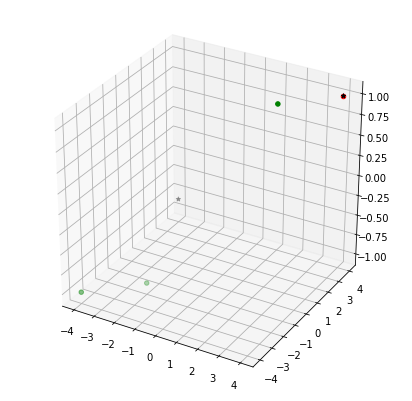

In [7]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[0][:, 0], cluster1[0][:, 1], cluster1[0][:, 2], c='r')
ax.scatter(cluster1[1][:, 0], cluster1[1][:, 1], cluster1[1][:, 2], c='g')
# ax.scatter(cluster[2][:, 0], cluster[2][:, 1], cluster[2][:, 2], c='b')
ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c='k', marker='*')
plt.show()

In [12]:
from sklearn.decomposition import PCA
file_handle = open('arcene_train.data')
arcene = np.array([list(map(int, file_handle.readline().strip().split(' '))) for _ in range(100)], dtype=np.float64)

In [13]:
cluster1, centroids1 = k_means(arcene[:,:3], 3)
centroids1

[[  0.  21.  12.]
 [105.   0. 141.]
 [ 13.  58.  17.]]


array([[ 14.37209302,   8.95348837,  17.13953488],
       [104.11538462,  34.76923077, 158.07692308],
       [ 12.29032258,  72.38709677,  25.90322581]])

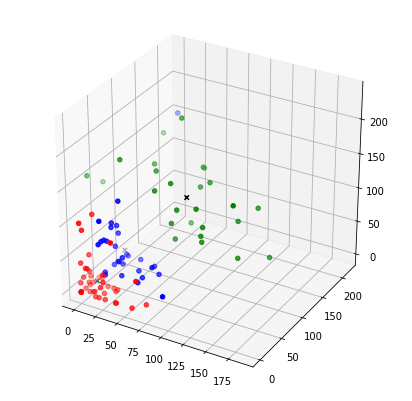

In [14]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster1[0][:, 0], cluster1[0][:, 1], cluster1[0][:, 2], c='r')
ax.scatter(cluster1[1][:, 0], cluster1[1][:, 1], cluster1[1][:, 2], c='g')
ax.scatter(cluster1[2][:, 0], cluster1[2][:, 1], cluster1[2][:, 2], c='b')
ax.scatter(centroids1[:, 0], centroids1[:, 1], centroids1[:, 2], c='k', marker='x')
plt.show()